# Latar Belakang
Besarnya potensi pariwisata di Thailand khususnya kota Bangkok, membuat permintaan akan akomodasi *short-term rental* yang fleksibel dan terjangkau seperti Airbnb menjadi sangat tinggi. Melihat potensi tersebut, sebuah perusahaan pengelola Airbnb berencana untuk mengajak investor untuk menginvestasikan dananya pada bisnis properti pengelolaan Airbnb. Dengan begitu, investor dapat memperoleh keuntungan dari bisnis properti di Bangkok yang pertumbuhan pariwisatanya semakin tinggi tanpa harus repot mengurus operasional sehari-hari.

# Pernyataan Masalah
Untuk membantu investor membuat keputusan investasi yang tepat, perusahaan harus menyediakan informasi yang komprehensif terkait Airbnb di Bangkok. Perusahaan ingin agar calon investor dapat mengidentifikasi lokasi strategis untuk membuat properti baru di kota Bangkok dan memaksimalkan potensi keuntungan yang bisa didapat pada area-area tertentu.

**Dimana lokasi strategis untuk membangun properti Airbnb baru di kota Bangkok?**

## Data
Untuk mengatasi masalah tersebut, kita akan menganalisis data ini

In [151]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

Dataset ini berisi informasi terkait lokasi, harga, tipe Airbnb yang disewakan di kota Bangkok, serta review pada aplikasi Airbnb. 
Dataset Airbnb Listings Bangkok ini memiliki 17 kolom, yaitu:
* Unnamed: 0 : urutan data dari nomor 0 sampai akhir data
* id : nomor unik untuk setiap properti
* name : nama properti pada aplikasi Airbnb
* host_id : nomor unik untuk setiap pengelola/pemilik properti
* host_name : nama pemilik/pengelola properti (*first name only*)
* neighbourhood : nama distrik di mana properti berada
* latitude : garis lintang/titik koordinat geografis properti
* longitude : garis bujur/titik koordinat geografis properti
* room_type : tipe ruangan properti yang disewakan
* price : harga sewa properti per malam
* minimum_nights : jumlah masa sewa  minimum properti 
* number_of_reviews : jumlah *review* properti pada aplikasi
* last_review : tanggal *review* terakhir properti pada aplikasi
* reviews_per_month : rata-rata jumlah *review* properti yang diterima per bulan
* calculated_host_listings_count : jumlah properti yang dimiliki pengelola/pemilik properti 
* availability_365 : jumlah ketersediaan hari untuk disewa dalam setahun
* number_of_reviews_ltm : jumlah *review* properti  pada aplikasi dalam 12 bulan terakhir

Berikut 5 baris teratas dan terbawah dari dataset Airbnb Listings Bangkok :

In [152]:
df = pd.read_csv('Airbnb Listings Bangkok.csv')
display(df.head(),df.tail())

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


## Data *Understanding and Cleaning*
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang ada pada dataset dan apa saja yang perlu ditangani dalam tahapan *data cleaning*. Setiap penyelesaian anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi umum dari dataset Airbnb Listings di Bangkok.

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

In [154]:
display(df.describe(), df.describe(include='object'))

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


Dari hasil di atas bisa kita simpulkan :
* Dataset Airbnb Listings Bangkok terdiri dari 17 kolom dan 15854 baris
* Kolom 'Unnamed : 0' berisi urutan index dari 0 - data terakhir, data kolom tersebut tidak relevan dan tidak digunakan pada saat analisis sehingga akan dihapus
* Dataset Airbnb Listings Bangkok memiliki data *unique* 14794 properti yang tersebar di 50 distrik yang ada di kota Bangkok
* Dataset Airbnb Listings Bangkok memiliki 4 tipe ruangan berbeda pada properti yang disewakan
* Terdapat data dengan nilai 0 pada kolom price, sedangkan pengelola tidak mungkin menyewakan properti seharga 0, maka data ini akan dihapus

In [155]:
# Menghapus nilai 0 pada kolom 'price'
df = df.loc[df['price']!=0]

## Missing Values

In [156]:
df.isna().sum()/df.shape[0]*100

Unnamed: 0                         0.000000
id                                 0.000000
name                               0.050464
host_id                            0.000000
host_name                          0.006308
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       36.516748
reviews_per_month                 36.516748
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

In [157]:
df.isna().sum()

Unnamed: 0                           0
id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5789
reviews_per_month                 5789
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

<Axes: >

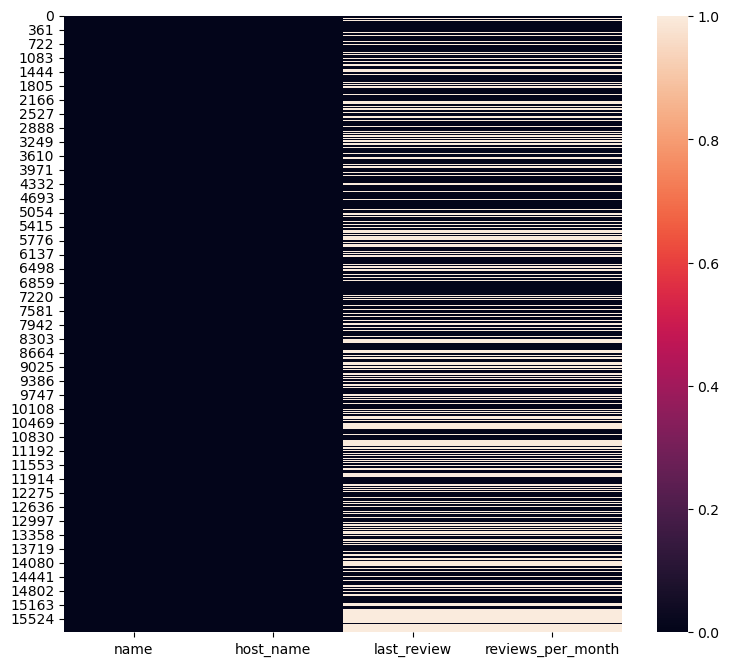

In [158]:
# Sebaran missing value di dalam data
plt.figure(figsize=(9,8))
sns.heatmap(df[['name', 'host_name', 'last_review', 'reviews_per_month']].isna())

Dari hasil di atas dapat disimpulkan :
* Kolom `name` memiliki 8 data kosong dengan presentase 0.05% maka *missing value* pada kolom `name` dan akan dihapus karena tidak berpengaruh signifikan terhadap analisis data Airbnb Listings Bangkok.
* Kolom `host_name` hanya memiliki 1 data kosong maka *missing value* pada kolom `host_name` dan akan dihapus karena tidak berpengaruh signifikan terhadap analisis data Airbnb Listings Bangkok.
* Persebaran *missing value* pada kolom `last_review` berhubungan dengan *missing value* pada kolom `reviews_per_month`, hal tersebut terlihat ketika data `last_review` kosong maka data `reviews_per_month` juga kosong. Jumlah *missing value* pada dua kolom tersebut sama sama 5790 baris atau 36.52%. Kedua kolom tersebut tidak bisa dihapus karena jumlah *missing value* <50% dan data masih dibutuhkan untuk analisa kedepannya, sedangkan menghapus baris pun tidak bisa karena jumlah *missing value* >10%.
* Kolom `last_review` memiliki 5790 data kosong dengan presentase 36.52% dan *missing value* akan diubah dari data NaN menjadi NaT agar kolom `last_review` bisa diubah ke type datetime.
* Kolom `reviews_per_month` memiliki 5790 data kosong dengan presentase 36.52% dan *missing value* akan diubah dari data NaN menjadi angka 0, karena memang pada periode tersebut tidak ada *review* yang masuk.





Kita sudah melihat gambaran kasar anomali di dalam data, sekarang, mari kita lihat dan tangani tiap-tiap anomali secara lebih jauh.  


In [159]:
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


In [160]:
# Menghapus kolom 'Unnamed : 0'
df = df.drop(columns='Unnamed: 0')

In [161]:
# Menghapus missing value pada kolom 'name'
df = df.dropna(subset=['name'])

In [162]:
# Menghapus missing value pada kolom 'host_name'
df = df.dropna(subset=['host_name'])

In [163]:
# Mengisi missing value pada kolom 'reviews_per_month' dengan nilai 0
df['reviews_per_month'].fillna(0, inplace=True)

In [164]:
# Mengubah data NaN pada kolom 'last_review' dengan NaT 
df['last_review'].fillna(pd.NaT, inplace=True)

In [165]:
# Mengubah type data kolom 'last_review' menjadi type datetime
df['last_review'] = pd.to_datetime(df['last_review']) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15844 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15844 non-null  int64         
 1   name                            15844 non-null  object        
 2   host_id                         15844 non-null  int64         
 3   host_name                       15844 non-null  object        
 4   neighbourhood                   15844 non-null  object        
 5   latitude                        15844 non-null  float64       
 6   longitude                       15844 non-null  float64       
 7   room_type                       15844 non-null  object        
 8   price                           15844 non-null  int64         
 9   minimum_nights                  15844 non-null  int64         
 10  number_of_reviews               15844 non-null  int64         
 11  last_re

Setelah mengubah type data kolom `last_review` menjadi datetime, kita akan memisahkan bulan dan tahun nya dan memasukkannya ke kolom baru untuk mempermudah analisis selanjutnya

In [166]:
# Mengekstrak data bulan dari kolom last_review
last_review_dt = df['last_review'].dt
last_review_dt.month_name()
df['month'] = last_review_dt.month_name()

In [167]:
# Mengekstrak data tahun dari kolom last_review
df['year'] = last_review_dt.year

In [168]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'month', 'year'],
      dtype='object')

In [169]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,month,year
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0,January,2020.0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaT,0.00,2,358,0,NaN,NaN
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaT,0.00,1,365,0,NaN,NaN
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1,April,2022.0
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaT,0.00,3,365,0,NaN,NaN


Melihat data pada kolom `id` dan `host_id` yang hanya berisi nomor unik dari properti dan nomor unik pengelola/pemilik dari properti yang tidak akan dipakai dalam analisis data kali ini, maka kolom `id` dan `host_id` akan dihapus

In [170]:
df = df.drop(columns=['id', 'host_id'])

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15844 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            15844 non-null  object        
 1   host_name                       15844 non-null  object        
 2   neighbourhood                   15844 non-null  object        
 3   latitude                        15844 non-null  float64       
 4   longitude                       15844 non-null  float64       
 5   room_type                       15844 non-null  object        
 6   price                           15844 non-null  int64         
 7   minimum_nights                  15844 non-null  int64         
 8   number_of_reviews               15844 non-null  int64         
 9   last_review                     10061 non-null  datetime64[ns]
 10  reviews_per_month               15844 non-null  float64       
 11  calcula

Sekarang data terdiri dari 16 kolom dan 15844 baris, dari sebelumnya 17 kolom dan 15854 baris. Kita sudah menghapus 10 baris dan 3 kolom yang tidak diperlukan serta menambahkan 2 kolom yaitu `month` dan `year` yang dibutuhkan untuk analisis kali ini. Kita juga sudah mengganti data yang kosong sesuai dengan kebutuhan yang sudah dijelaskan sebelumnya.

## Analisis Data

Setelah melakukan Data Cleaning, kita bisa melanjutkan analisis data untuk mencari tahu tipe properti apa yang banyak dibutuhkan wisatawan serta di mana lokasi yang strategis untuk membuat properti Airbnb di kota Bangkok.

Sebelum itu mari kita lihat tren penyewaan Airbnb di kota Bangkok berdasarkan jumlah review dari tahun 2012 sampai dengan 2022 :


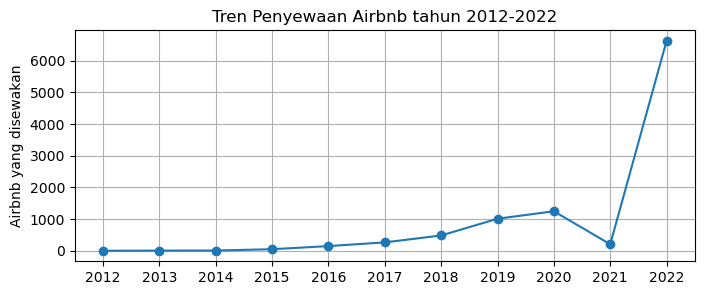

In [172]:
year_trend = df[['year', 'number_of_reviews']].groupby('year').count()

plt.figure(figsize=(8,3))
plt.plot(year_trend.index, year_trend['number_of_reviews'], marker='o', linestyle='-')
plt.title('Tren Penyewaan Airbnb tahun 2012-2022')
plt.ylabel('Airbnb yang disewakan')
plt.grid(True)
plt.xticks(year_trend.index)
plt.show()


Dari grafik tersebut bisa dilihat bahwa:
* Tren penyewaan Airbnb di Bangkok dihitung dari jumlah review cenderung naik dari tahun 2012 hingga tahun 2022.
* Terdapat penurunan pada tahun 2021 yang terjadi karena merebaknya kasus Covid-19 sehingga wisatawan tidak bisa masuk ke Thailand.
* Pada tahun 2021 terdapat kenaikan yang signifikan pada penyewaan Airbnb bersamaan dengan meredanya Covid-19 dan tingginya minat wisatawan untuk kembali berlibur di Thailand setelah 1 tahun tidak bisa melakukan perjalanan luar negeri karena wabah Covid-19.

Berikut adalah tren penyewaan Airbnb berdasarkan bulan :

In [173]:
month = pd.crosstab(df['neighbourhood'], columns=df['month'], margins=True).T.drop('All', axis=0)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month.index = pd.CategoricalIndex(month.index, categories=month_order, ordered=True)
month = month.sort_index()

month

neighbourhood,Bang Bon,Bang Kapi,Bang Khae,Bang Khen,Bang Kho laen,Bang Khun thain,Bang Na,Bang Phlat,Bang Rak,Bang Sue,...,Sathon,Suanluang,Taling Chan,Thawi Watthana,Thon buri,Thung khru,Vadhana,Wang Thong Lang,Yan na wa,All
month,,,,,,,,,,,,,,,,,,,,,
January,0,9,1,4,12,0,12,11,47,9,...,26,11,2,0,4,0,64,2,5,628
February,0,5,2,4,2,0,7,14,45,10,...,22,12,1,1,8,1,47,5,10,537
March,0,14,4,3,4,0,11,8,33,11,...,19,11,0,1,4,0,41,1,7,520
April,0,9,4,1,7,0,9,7,17,4,...,14,10,0,0,1,0,41,3,3,310
May,0,1,1,3,3,0,9,7,16,1,...,6,4,0,0,7,0,25,2,2,235
June,0,4,1,2,2,1,10,2,12,3,...,15,10,2,0,4,0,35,2,4,267
July,0,6,1,1,1,0,17,8,27,4,...,14,12,2,0,9,0,50,3,5,393
August,0,3,1,5,5,1,9,4,30,9,...,26,7,0,0,3,1,56,2,3,474
September,1,4,4,9,5,0,21,5,35,9,...,22,12,1,0,4,0,83,1,6,530


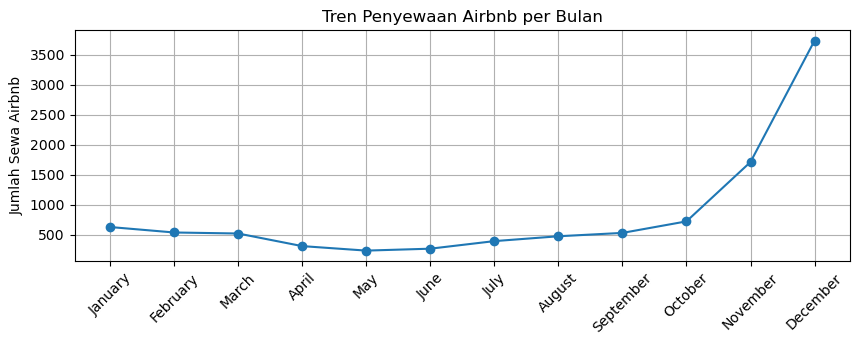

In [174]:
plt.figure(figsize=(10, 3))
plt.plot(month.index, month['All'], marker='o', linestyle='-')
plt.title('Tren Penyewaan Airbnb per Bulan')
plt.ylabel('Jumlah Sewa Airbnb')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Dari grafik di atas bisa dilihat bahwa:
* Berdasarkan bulan, penyewaan tertinggi ada di bulan Desember karena bulan Desember bertepatan dengan libur natal dan tahun baru sehingga banyak dimanfaatkan turis untuk berlibur ke Bangkok, Thailand (High Season).

### Analisis berdasarkan review pelanggan

Pada analisis ini kita menggunakan kolom `number_of_reviews` yaitu jumlah review properti pada aplikasi Airbnb selama 2012-2022

Berikut adalah 10 Distrik di kota Bangkok dengan review terbanyak dari tahun 2012 sampai 2022:

In [176]:
district_byreview = df.groupby('neighbourhood')['number_of_reviews'].sum().reset_index()

df_sorted = district_byreview.sort_values(by='number_of_reviews', ascending=False).head(10)
df_sorted

,neighbourhood,number_of_reviews
22,Khlong Toei,41279
47,Vadhana,37415
41,Sathon,22242
37,Ratchathewi,20692
18,Huai Khwang,18145
8,Bang Rak,17654
31,Phaya Thai,13659
29,Parthum Wan,9103
13,Chatu Chak,8218
33,Phra Nakhon,8142


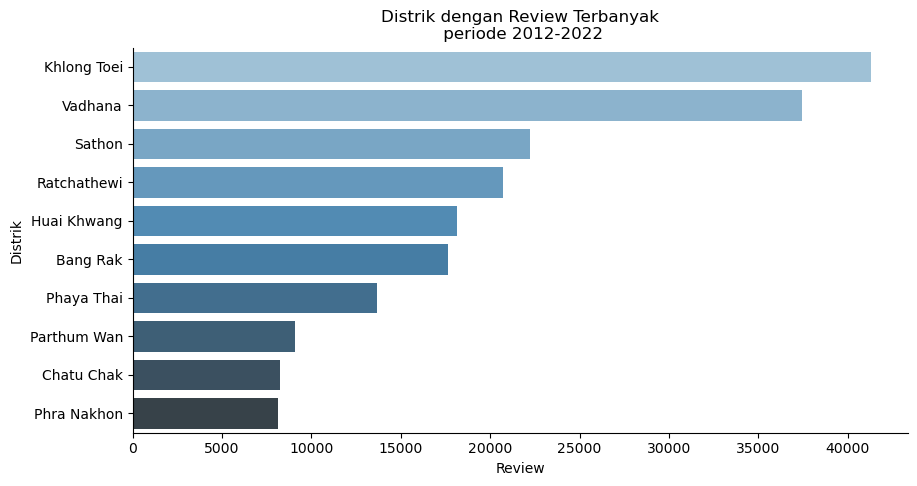

In [177]:
plt.figure(figsize=(10, 5))
sns.barplot(x='number_of_reviews', y='neighbourhood', data=df_sorted, palette='Blues_d')
plt.title('Distrik dengan Review Terbanyak\n periode 2012-2022')
plt.xlabel('Review')
plt.ylabel('Distrik')

for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

plt.show()

Dari grafik di atas bisa disimpulkan bahwa properti Airbnb dengan review terbanyak sejak tahun 2012 sampai tahun 2022 berlokasi di Distrik Khlong Toei dengan total 41.279 review, dan pada urutan kedua berlokasi di Distrik Vadhana dengan total 37.415 review.

Berikut adalah proporsi tipe ruangan Airbnb yang paling banyak disewa berdasarkan review yang diberikan di aplikasi:

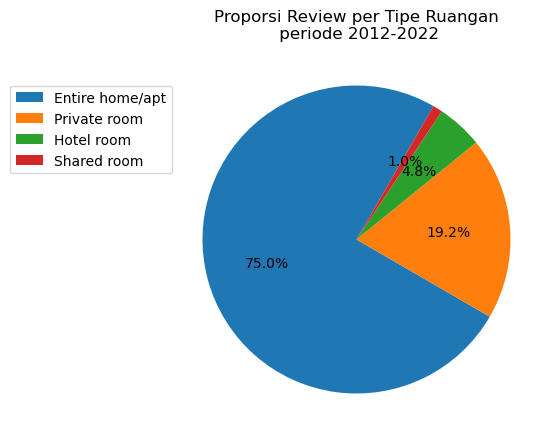

In [178]:
roomtype_byreview = df.groupby('room_type')['number_of_reviews'].sum().reset_index()

df_sorted = roomtype_byreview.sort_values(by='number_of_reviews', ascending=False)

plt.figure(figsize=(5, 5),)
plt.pie(df_sorted['number_of_reviews'], autopct='%1.1f%%', startangle=60)
plt.title('Proporsi Review per Tipe Ruangan\n periode 2012-2022')
plt.legend(labels=df_sorted['room_type'], bbox_to_anchor=(-0.4, 0.9), loc='upper left', borderaxespad=0.)

plt.show()

Dari grafik di atas bisa dilihat tipe ruangan yang paling diminati adalah tipe `Entire Home/Apt` dengan nilai 75%, dan tipe yang paling sedikit diminati adalah tipe `Shared Room` dengan nilai 1%.

Entire home/apt merupakan tipe ruangan yang paling diminati karena penyewanya bukan hanya wisatawan, tetapi juga pekerja dari luar negeri. Para pekerja tersebut membutuhkan akomodasi jangka panjang dengan harga yang lebih rendah, sehingga apartemen merupakan pilihan yang cocok

Dari dua analisis berdasarkan Review pelanggan di atas bisa kita simpulkan bahwa:
* Lokasi yang paling diminati wisatawan sebagai tempat menginap di kota Bangkok berlokasi di distrik Khlong Toei dan Vadhana
* Tipe Ruangan Airbnb yang paling diminati adalah tipe `Entire Home/Apt`

### Analisis berdasarkan neighbourhood / distrik


Pada analisis ini kita akan menggunakan kolom `Neighbourhood` atau distrik lokasi properti Airbnb yang disewakan

Berikut adalah analisis untuk mengetahui distrik di kota Bangkok yang properti Airbnbnya paling banyak disewa dalam 12 bulan terakhir

In [179]:
district_recentreview = pd.crosstab(df['neighbourhood'], columns='number_of_reviews_ltm').sort_values(by='number_of_reviews_ltm', ascending=False).head(10)
district_recentreview

col_0,number_of_reviews_ltm
neighbourhood,
Vadhana,2150
Khlong Toei,2096
Huai Khwang,1125
Ratchathewi,1113
Bang Rak,827
Sathon,809
Phra Nakhon,619
Phra Khanong,557
Chatu Chak,548


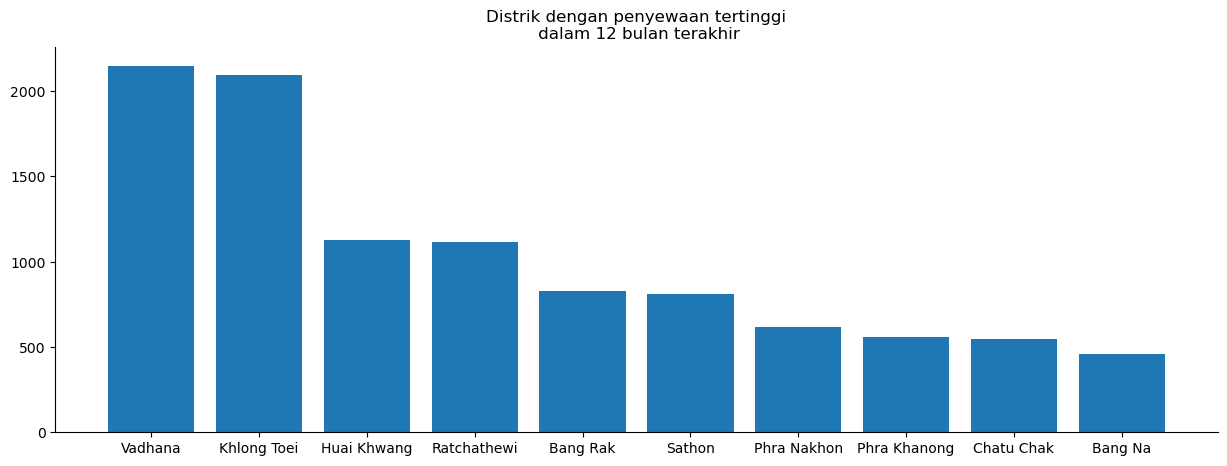

In [180]:
plt.figure(figsize=(15,5))
plt.bar(district_recentreview.index, district['number_of_reviews_ltm'])
plt.title('Distrik dengan penyewaan tertinggi\n dalam 12 bulan terakhir')

for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

plt.show()

Dari grafik di atas bisa dilihat:
* Vadhana merupakan distrik yang memiliki properti Airbnb dengan jumlah penyewaan terbanyak selama 12 bulan terakhir
* Meskipun Khlong Toei merupakan distrik dengan tingkat penyewaan terbanyak periode 2012-2022, Khlong Toei juga terkenal sebagai distrik yang memiliki kawasan kumuh terbesar dan tertua di kota Bangkok dengan peluang kriminalitas yang cukup tinggi sehingga wisatawan cenderung akan lebih memilih distrik yang lebih aman.



### Analisis berdasarkan harga sewa per malam

Pada analisis ini kita akan menggunakan median dalam menghitung analisis harga sewa karena median tidak begitu terpengaruh oleh data yang ekstrem sehingga hasil analisis akan lebih representatif.

Berikut adalah analisis harga sewa Airbnb permalam berdasarkan tipe ruangan:

In [182]:
medprice_room_type = df.groupby('room_type')['price'].median().reset_index()

df_sorted = medprice_room_type.sort_values(by='price', ascending=False)
df_sorted

,room_type,price
1,Hotel room,1700.0
0,Entire home/apt,1536.0
2,Private room,1213.5
3,Shared room,500.0


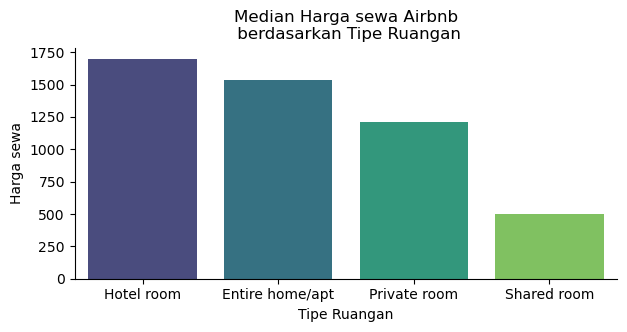

In [183]:
plt.figure(figsize=(7, 3))
sns.barplot(x='room_type', y='price', data=df_sorted, palette='viridis')
plt.title('Median Harga sewa Airbnb\n berdasarkan Tipe Ruangan')
plt.xlabel('Tipe Ruangan')
plt.ylabel('Harga sewa')

for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

plt.show()

Dari grafik tersebut bisa dilihat bahwa median harga sewa Airbnb permalam paling tinggi ada pada tipe ruangan `Hotel room`dan median harga sewa Airbnb permalam paling rendah ada pada tipe ruangan `Shared room`.

Berikut adalah analisis harga sewa Airbnb permalam di 10 Distrik terpopuler:

In [184]:
district = pd.crosstab(df['neighbourhood'], columns='number_of_reviews').sort_values(by='number_of_reviews', ascending=False).head(10).index
dist_top10 = df[df['neighbourhood'].isin(district)]
district_stats = dist_top10.groupby('neighbourhood')['price'].describe()
district_stats.sort_values(by='count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
neighbourhood,,,,,,,,
Vadhana,2150.0,4455.553023,33116.746405,350.0,1290.75,2000.0,3463.00,1100000.0
Khlong Toei,2096.0,4250.951813,33923.873457,332.0,1175.25,1700.0,2573.25,1000000.0
Huai Khwang,1125.0,5036.084444,51769.888603,313.0,950.00,1351.0,2200.00,1000000.0
Ratchathewi,1113.0,3201.310872,18248.167283,320.0,1200.00,1536.0,2500.00,300000.0
Bang Rak,827.0,3056.336155,10749.686959,295.0,1100.00,1850.0,3199.00,300000.0
Sathon,809.0,2338.238566,7793.697671,318.0,1000.00,1300.0,2074.00,200000.0
Phra Nakhon,619.0,1731.361874,1850.933441,280.0,597.00,1114.0,2000.00,17316.0
Phra Khanong,557.0,1483.978456,1804.033668,305.0,750.00,1000.0,1600.00,24242.0
Chatu Chak,548.0,2294.386861,8263.712686,315.0,800.00,1100.0,1780.00,122594.0


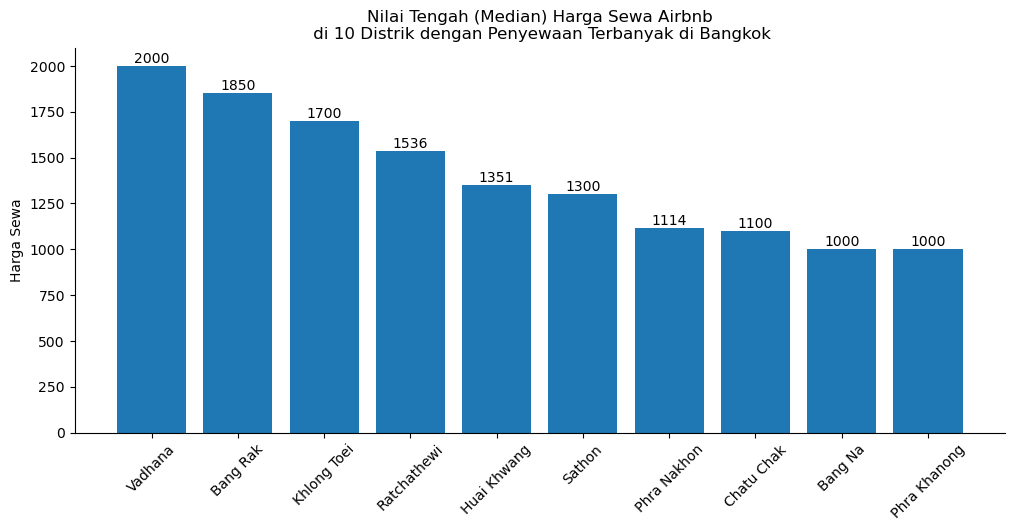

In [185]:
median_prices = dist_top10.groupby('neighbourhood')['price'].median()

median_prices = median_prices.sort_values(ascending=False)

plt.figure(figsize=(12, 5))
bars = plt.bar(median_prices.index, median_prices.values)
plt.ylabel('Harga Sewa')
plt.title('Nilai Tengah (Median) Harga Sewa Airbnb\n di 10 Distrik dengan Penyewaan Terbanyak di Bangkok')
plt.xticks(rotation=45)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

plt.show()

Dengan mengambil nilai tengah (median) dari harga sewa Airbnb permalam di 10 distrik terpopuler di kota Bangkok, Vadhana menjadi distrik dengan harga sewa per malam paling mahal yaitu di 2000 THB. Disusul distrik Bang Rak di posisi kedua dengan harga 1850 THB dan distrik Khlong Toei di posisi ketiga dengan harga 1700 THB.
Bisa disimpulkan bahwa harga sewa Airbnb permalam di distrik distrik populer lebih mahal dari distrik lain.

Berikut adalah grafik median harga sewa Airbnb di kota Bangkok periode 2012 sampai 2022:

In [186]:
median_prices_year = df.groupby('year')['price'].median().reset_index()
median_prices_year['year'] = median_prices_year['year'].astype(int)
median_prices_year

,year,price
0,2012,500.0
1,2013,1290.0
2,2014,1736.0
3,2015,1392.5
4,2016,1300.0
5,2017,1295.0
6,2018,1300.0
7,2019,1200.0
8,2020,1177.0
9,2021,1200.0


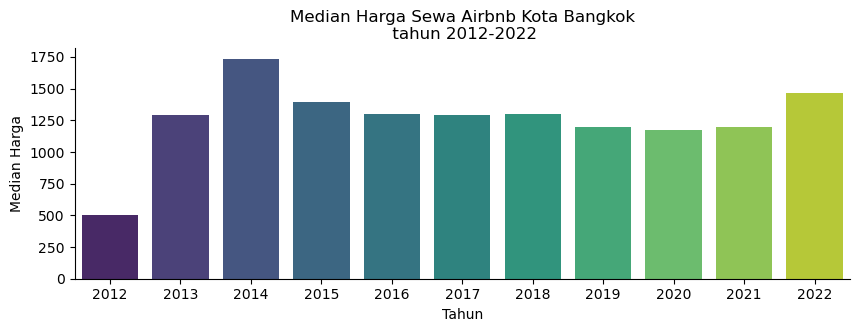

In [187]:
plt.figure(figsize=(10, 3))
sns.barplot(x='year', y='price', data=median_prices_year, palette='viridis')
plt.title('Median Harga Sewa Airbnb Kota Bangkok\n tahun 2012-2022')
plt.xlabel('Tahun')
plt.ylabel('Median Harga')

for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

plt.show()

Dari grafik di atas bisa dilihat terdapat fluktuasi median harga sewa Airbnb di kota Bangkok dari tahun 2012 sampai 2022.

Sebelumnya dapat disimpulkan bahwa tren penyewaan pada 10 tahun terakhir cenderung meningkat dan grafik median harga sewa Airbnb dari tahun 2012 sampai 2022 mengalami fluktuasi. Selanjutnya kita akan mencari tau apakah terdapat korelasi antara Harga sewa dan Tahun

## Uji Korelasi Spearman

In [190]:
df_cleaned = df.dropna(subset=['price', 'year'])

corr, p_value = spearmanr(df_cleaned['price'], df_cleaned['year'])
print(f"Koefisien Korelasi Spearman: {corr:.3f} (p-value: {p_value:.3f})")

Koefisien Korelasi Spearman: 0.077 (p-value: 0.000)


c:\Users\shabi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\shabi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


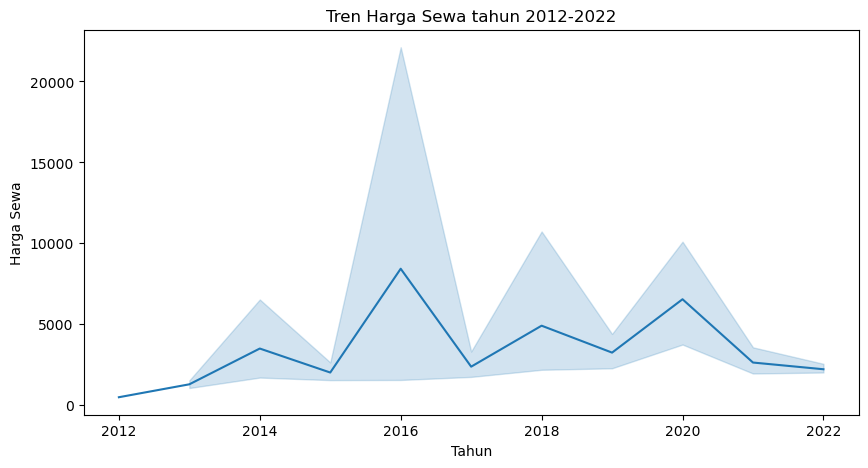

In [191]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='year', y='price', data=df_cleaned)
plt.title('Tren Harga Sewa tahun 2012-2022')
plt.xlabel('Tahun')
plt.ylabel('Harga Sewa')
plt.show()

Dari grafik di atas bisa dilihat adanya tren kenaikan harga sewa Airbnb dari tahun 2012 hingga 2022, dengan fluktuasi yang cukup signifikan. Di tahun 2016 ada peningkatan harga yang cukup tinggi, tetapi setelahnya ada penurunan harga hingga tahun 2018 dan selanjutnya harga sewa cenderung stabil hingga tahun 2022 dengan variasi harga yang cukup luas.

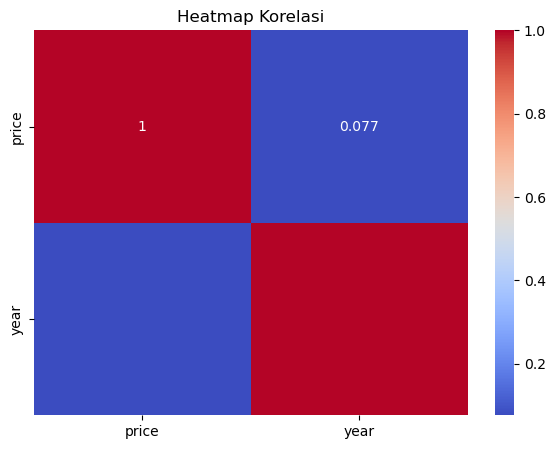

In [192]:
corr = df[['price', 'year']].corr('spearman')
plt.figure(figsize=(7, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

Setelah dilakukan analisis korelasi spearman, bisa dilihat bahwa nilai hasil korelasi antara `price` dan `year` yaitu 0.077 dimana nilai tersebut relatif kecil tapi menunjukkan hubungan yang positif. Sehingga bisa kita simpulkan bahwa Harga sewa cenderung akan meningkat seiring berjalannya waktu, tetapi hal tersebut terjadi karena dipengaruhi beberapa faktor lainnya.

## Kesimpulan :

* Tren penyewaan Airbnb di Kota Bangkok pada tahun 2021 (setelah covid-19) meningkat pesat, dengan High Season dimulai dari bulan Oktober sampai awal bulan Januari. Sehingga sebaiknya pembangunan properti dimulai di bulan Januari dan selesai sebelum High Season dimulai agar bisa langsung dipromosikan dan disewa saat High Season dimulai.
* Tipe kamar yang paling banyak diminati adalah tipe Entire home/apt. Hal tersebut dapat menjadi pertimbangan dalam pembangunan properti baru untuk disewakan. Kemungkinan penyewa Entire home/apt tinggi karena biasanya turis datang berkelompok sehingga membutuhkan ruang untuk bersama yang cukup besar dengan harga sewa yang masih affordable.
* Berdasarkan review di aplikasi pada tahun 2012-2022, properti dengan penyewaan terbanyak adalah properti di distrik Khlong Toei. Akan tetapi jika melihat review pada 12 bulan terakhir, properti dengan penyewaan terbanyak adalah properti di distrik Vadhana. Hal ini terjadi karena sepertinya distrik Vadhana dipandang lebih aman untuk wisatawan dibanding distrik Khlong Toei.
* Walaupun harga sewa akomodasi di distrik Khlong Toei dan Vadhana cenderung lebih mahal daripada distrik lain, minat sewa pada kedua distrik ini masih lebih tinggi dari pada distrik lainnya.